In [375]:
#python libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning libraries
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [376]:
df= pd.read_csv('Train.csv')
df1= pd.read_csv('Test.csv')


- Definitions of the features:


- ID:	Person unique/random identification
country_code	The country codes
- region:	Region_codes of a given country,.i.e., South Asia, Europe, etc
- age:	Individual age
- FQ1:	Has ATM/debit card
- FQ2: Is the ATM connected to an account with your name?
- FQ3:	Purchased with the ATM
- FQ4:	Has a credit card
- FQ5:	Used the credit card in 12 months
- FQ6:	Money deposits to a bank account in the last 12 months
- FQ7: 	Money withdrawals from a bank account in the last 12 months
- FQ8: 	Savings in the last 12 months to start a business/farm
- FQ9: 	Savings in the last 12 months for old age
- FQ10: Saved the money at a bank/financial institutions
- FQ11:	Save the money at groups/clubs of any informal type
- FQ12:	Has a loan from formal financial institutions to purchase land, home, or apartment
- FQ13:	Borrowed money for health/medical purposes in the last 12 months
- FQ14:	Borrowed money to start/grow business or farm
- FQ15:	Borrowed money from formal financial institutions - 12 months
- FQ16:	Borrowed money from friends, relatives, or family - 12 months
- FQ17:	Borrowed money from an informal saving. I.e group or club
- FQ18:	What is the possibility of coming up with 1/20 of per capita in 1 month
- FQ19:	Source of money for FQ18
- FQ20:	Sent/given money to friend/relative
- FQ21:	Received money from friend or relative
- FQ22:	Payments for electricity, water, or trash in the last 12 months
- FQ23:	salary/wages in the last 12 months
- FQ24:	Employed by government or public sector -12 months
- FQ25:	Received any form of financial support from the government
- FQ26:	Pension in the last 12 months
- FQ27:	Was the a/c you received money from the government your first?
- FQ28:	Did you open the a/c to receive payments from the government
- FQ29:	Received money for the sale of livestock, agricultural products, crops, produce? (12 months)
- FQ30:	Was this your first a/c for transaction in FQ29
- FQ31:	Did you open the a/c to receive payments in FQ29
- FQ32:	Received money from your business in last 12 months
- FQ33:	Owns a mobile phone
- FQ34:	Has national ID card
- FQ35:	Was the a/c you received money from your employer your first?
- FQ36:	Did you open the a/c to receive the money in FQ36
- FQ37:	Owns a bank a/c
- Target:	Determine whether one has used mobile or internet banking.


In [377]:
df.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,...,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,0
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,0


In [378]:
df1.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,...,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37
0,ID_000YI58E,39,2,22.0,2,NaN,NaN,2,NaN,1.0,...,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0
1,ID_001SP4JF,30,2,62.0,1,NaN,NaN,2,NaN,1.0,...,2,NaN,NaN,2.0,NaN,1.0,1.0,1.0,1.0,0
2,ID_001VOF6S,65,4,35.0,2,1.0,NaN,1,1.0,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0
3,ID_0030LULG,123,0,24.0,2,1.0,NaN,2,NaN,1.0,...,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1
4,ID_0037PZ3R,67,2,25.0,2,NaN,NaN,1,NaN,NaN,...,2,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,1


# Data Exploration

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

In [380]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46477 entries, 0 to 46476
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            46477 non-null  object 
 1   country_code  46477 non-null  int64  
 2   region        46477 non-null  int64  
 3   age           46348 non-null  float64
 4   FQ1           46477 non-null  int64  
 5   FQ2           20801 non-null  float64
 6   FQ3           19928 non-null  float64
 7   FQ4           46477 non-null  int64  
 8   FQ5           8913 non-null   float64
 9   FQ6           25878 non-null  float64
 10  FQ7           25917 non-null  float64
 11  FQ8           46477 non-null  int64  
 12  FQ9           46477 non-null  int64  
 13  FQ10          46477 non-null  int64  
 14  FQ11          35912 non-null  float64
 15  FQ12          46477 non-null  int64  
 16  FQ13          46477 non-null  int64  
 17  FQ14          46477 non-null  int64  
 18  FQ15          46477 non-nu

In [381]:
df.duplicated().sum()

0

In [382]:
df1.duplicated().sum()

0

In [383]:
df.isna().sum()

ID                   0
country_code         0
region               0
age                322
FQ1                  0
FQ2              59322
FQ3              62228
FQ4                  0
FQ5              87261
FQ6              47787
FQ7              47826
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             24570
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17             97099
FQ18                 0
FQ19             47407
FQ20             24679
FQ21             24635
FQ22                 0
FQ23                 0
FQ24             70014
FQ35             82557
FQ36             96963
FQ25                 0
FQ26                 0
FQ27            105246
FQ28            106940
FQ29             24534
FQ30            106331
FQ31            107577
FQ32             47650
FQ33                 2
FQ34             31794
FQ37                 0
Target               0
dtype: int64

In [384]:
df1.isna().sum()

ID                  0
country_code        0
region              0
age               129
FQ1                 0
FQ2             25676
FQ3             26549
FQ4                 0
FQ5             37564
FQ6             20599
FQ7             20560
FQ8                 0
FQ9                 0
FQ10                0
FQ11            10565
FQ12                0
FQ13                0
FQ14                0
FQ15                0
FQ16                0
FQ17            41599
FQ18                0
FQ19            20357
FQ20            10456
FQ21            10500
FQ22                0
FQ23                0
FQ24            29912
FQ35            35425
FQ36            41577
FQ25                0
FQ26                0
FQ27            45034
FQ28            45846
FQ29            10601
FQ30            45601
FQ31            46113
FQ32            20477
FQ33                0
FQ34            13341
FQ37                0
dtype: int64

In [385]:
df = df.drop('FQ31', axis=1)
df = df.drop('FQ28', axis=1)
df = df.drop('FQ30', axis=1)
df = df.drop('FQ27', axis=1)
df = df.drop('FQ5', axis=1)
df = df.drop('FQ3', axis=1)
df = df.drop('FQ24', axis=1)
df = df.drop('FQ35', axis=1)
df = df.drop('FQ2', axis=1)
df = df.drop('FQ36', axis=1)
df = df.drop('FQ17', axis=1)

In [386]:
df1 = df1.drop('FQ31', axis=1)
df1 = df1.drop('FQ28', axis=1)
df1 = df1.drop('FQ30', axis=1)
df1 = df1.drop('FQ27', axis=1)
df1 = df1.drop('FQ5', axis=1)
df1 = df1.drop('FQ3', axis=1)
df1 = df1.drop('FQ24', axis=1)
df1 = df1.drop('FQ35', axis=1)
df1 = df1.drop('FQ2', axis=1)
df1 = df1.drop('FQ36', axis=1)
df1 = df1.drop('FQ17', axis=1)

In [387]:
# Fill null values with the mean of the existing values in each individual column

mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

mean_value = df['FQ6'].mean()
df['FQ6'] = df['FQ6'].fillna(mean_value)

mean_value = df['FQ7'].mean()
df['FQ7'] = df['FQ7'].fillna(mean_value)

mean_value = df['FQ11'].mean()
df['FQ11'] = df['FQ11'].fillna(mean_value)

mean_value = df['FQ19'].mean()
df['FQ19'] = df['FQ19'].fillna(mean_value)

mean_value = df['FQ20'].mean()
df['FQ20'] = df['FQ20'].fillna(mean_value)

mean_value = df['FQ21'].mean()
df['FQ21'] = df['FQ21'].fillna(mean_value)

mean_value = df['FQ29'].mean()
df['FQ29'] = df['FQ29'].fillna(mean_value)

mean_value = df['FQ32'].mean()
df['FQ32'] = df['FQ32'].fillna(mean_value)

mean_value = df['FQ33'].mean()
df['FQ33'] = df['FQ33'].fillna(mean_value)

mean_value = df['FQ34'].mean()
df['FQ34'] = df['FQ34'].fillna(mean_value)

In [388]:
# Fill null values with the mean of the existing values in each individual column

mean_age = df1['age'].mean()
df1['age'].fillna(mean_age, inplace=True)

mean_value = df1['FQ6'].mean()
df1['FQ6'] = df1['FQ6'].fillna(mean_value)

mean_value = df1['FQ7'].mean()
df1['FQ7'] = df1['FQ7'].fillna(mean_value)

mean_value = df1['FQ11'].mean()
df1['FQ11'] = df1['FQ11'].fillna(mean_value)

mean_value = df1['FQ19'].mean()
df1['FQ19'] = df1['FQ19'].fillna(mean_value)

mean_value = df1['FQ20'].mean()
df1['FQ20'] = df1['FQ20'].fillna(mean_value)

mean_value = df1['FQ21'].mean()
df1['FQ21'] = df1['FQ21'].fillna(mean_value)

mean_value = df1['FQ29'].mean()
df1['FQ29'] = df1['FQ29'].fillna(mean_value)

mean_value = df1['FQ32'].mean()
df1['FQ32'] = df1['FQ32'].fillna(mean_value)

mean_value = df1['FQ33'].mean()
df1['FQ33'] = df1['FQ33'].fillna(mean_value)

mean_value = df1['FQ34'].mean()
df1['FQ34'] = df1['FQ34'].fillna(mean_value)

In [389]:
df.isna().sum()

ID              0
country_code    0
region          0
age             0
FQ1             0
FQ4             0
FQ6             0
FQ7             0
FQ8             0
FQ9             0
FQ10            0
FQ11            0
FQ12            0
FQ13            0
FQ14            0
FQ15            0
FQ16            0
FQ18            0
FQ19            0
FQ20            0
FQ21            0
FQ22            0
FQ23            0
FQ25            0
FQ26            0
FQ29            0
FQ32            0
FQ33            0
FQ34            0
FQ37            0
Target          0
dtype: int64

In [390]:
df1.isna().sum()

ID              0
country_code    0
region          0
age             0
FQ1             0
FQ4             0
FQ6             0
FQ7             0
FQ8             0
FQ9             0
FQ10            0
FQ11            0
FQ12            0
FQ13            0
FQ14            0
FQ15            0
FQ16            0
FQ18            0
FQ19            0
FQ20            0
FQ21            0
FQ22            0
FQ23            0
FQ25            0
FQ26            0
FQ29            0
FQ32            0
FQ33            0
FQ34            0
FQ37            0
dtype: int64

In [391]:
df

,ID,country_code,region,age,FQ1,FQ4,FQ6,FQ7,FQ8,FQ9,...,FQ22,FQ23,FQ25,FQ26,FQ29,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,2,1.223907,1.000000,2,1,...,1,2,2,2,1.00000,1.854744,1.0,1.000000,0,0
1,ID_000QLXZM,32,7,70.0,2,2,1.223907,1.000000,2,2,...,1,2,1,1,2.00000,1.854744,1.0,2.000000,0,0
2,ID_001728I2,71,7,22.0,2,2,1.223907,1.000000,2,2,...,1,2,2,1,2.00000,1.854744,2.0,1.000000,1,0
3,ID_001R7IDN,48,3,27.0,1,2,2.000000,1.206961,2,1,...,1,2,2,2,1.86033,2.000000,1.0,1.000000,1,0
4,ID_0029QKF8,25,0,79.0,2,2,1.223907,1.206961,2,2,...,1,1,2,2,2.00000,2.000000,1.0,1.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108441,ID_ZZYY7RTO,111,4,23.0,2,2,2.000000,1.206961,1,2,...,2,2,2,2,1.86033,1.854744,1.0,1.127511,1,0
108442,ID_ZZYZTTC6,77,4,60.0,1,2,1.223907,1.206961,2,2,...,1,2,2,2,1.86033,1.854744,1.0,1.000000,1,0
108443,ID_ZZZ3OW3S,42,2,59.0,1,1,1.223907,1.000000,2,2,...,1,2,2,2,2.00000,2.000000,1.0,2.000000,1,1
108444,ID_ZZZLDXE8,57,7,79.0,1,2,1.000000,1.206961,2,2,...,1,2,2,2,2.00000,1.854744,1.0,1.000000,1,0


In [392]:
df1

,ID,country_code,region,age,FQ1,FQ4,FQ6,FQ7,FQ8,FQ9,...,FQ21,FQ22,FQ23,FQ25,FQ26,FQ29,FQ32,FQ33,FQ34,FQ37
0,ID_000YI58E,39,2,22.0,2,2,1.000000,1.206621,1,2,...,1.785835,1,1,2,2,1.856478,2.000000,1.0,1.000000,0
1,ID_001SP4JF,30,2,62.0,1,2,1.000000,1.000000,2,1,...,1.785835,1,2,2,2,2.000000,1.000000,1.0,1.000000,0
2,ID_001VOF6S,65,4,35.0,2,1,1.222467,1.000000,2,2,...,2.000000,1,2,2,2,1.856478,1.850692,1.0,1.129466,0
3,ID_0030LULG,123,0,24.0,2,2,1.000000,1.000000,1,2,...,2.000000,2,2,1,2,2.000000,1.850692,1.0,1.000000,1
4,ID_0037PZ3R,67,2,25.0,2,1,1.222467,2.000000,2,1,...,2.000000,1,2,2,2,1.000000,1.850692,2.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46472,ID_ZZYOTVBJ,112,3,38.0,1,2,1.222467,1.206621,2,2,...,1.785835,2,2,2,2,4.000000,1.850692,1.0,1.000000,1
46473,ID_ZZYSX122,82,2,77.0,2,2,1.000000,1.000000,1,2,...,2.000000,2,2,2,1,2.000000,1.850692,1.0,2.000000,1
46474,ID_ZZYXQDSD,93,5,26.0,2,2,1.000000,1.206621,1,1,...,1.785835,1,4,1,2,2.000000,1.850692,1.0,1.000000,1
46475,ID_ZZZH9SS4,6,7,59.0,2,2,1.000000,1.206621,2,2,...,1.785835,2,2,2,2,1.856478,1.850692,1.0,1.000000,1


In [393]:
df.nunique()

ID              108446
country_code       144
region               9
age                 86
FQ1                  4
FQ4                  4
FQ6                  5
FQ7                  5
FQ8                  4
FQ9                  4
FQ10                 4
FQ11                 5
FQ12                 4
FQ13                 4
FQ14                 4
FQ15                 4
FQ16                 4
FQ18                 4
FQ19                 9
FQ20                 5
FQ21                 5
FQ22                 4
FQ23                 4
FQ25                 4
FQ26                 4
FQ29                 5
FQ32                 5
FQ33                 5
FQ34                 5
FQ37                 2
Target               2
dtype: int64

In [394]:
df1.nunique()

ID              46477
country_code      144
region              9
age                85
FQ1                 4
FQ4                 4
FQ6                 5
FQ7                 5
FQ8                 4
FQ9                 4
FQ10                4
FQ11                5
FQ12                4
FQ13                4
FQ14                4
FQ15                4
FQ16                4
FQ18                4
FQ19                9
FQ20                5
FQ21                5
FQ22                4
FQ23                4
FQ25                4
FQ26                4
FQ29                5
FQ32                5
FQ33                4
FQ34                5
FQ37                2
dtype: int64

# Renaming of variables

In [395]:
# Renaming the columns using the .rename() method
df.rename(columns={
    'FQ1': 'has_d/card',
    'FQ4': 'has_c/card',
    'FQ6': 'moneyDep_12m',
    'FQ7': 'moneyOut_12m',
    'FQ8': 'businSave_12m',
    'FQ9': 'oldAgeSave_12',
    'FQ10': 'savedMoney',
    'FQ11': 'informalSave',
    'FQ12': 'hasLoan',
    'FQ13': 'medicalLoan',
    'FQ14': 'businLoan',
    'FQ15': 'informalLoan',
    'FQ16': 'fromPersonalLoan',
    'FQ18': 'perCapita1/20',
    'FQ19': 'incomeSouce',
    'FQ20': 'sent2person',
    'FQ21': 'recievFromPerson',
    'FQ22': 'levies_12m',
    'FQ23': 'salary_12m',
    'FQ25': 'govFinancing',
    'FQ26': 'PensionF_12m',
    'FQ29': 'agriSale',
    'FQ31': 'OpenedAgriSaleAcc',
    'FQ32': 'BusinSale',
    'FQ33': 'mobilePhone',
    'FQ34': 'hasIDCard',
    'FQ37': 'hasBanka/c'
}, inplace=True)

print(df)


                 ID  country_code  region   age  has_d/card  has_c/card  \
0       ID_000J8GTZ             1       6  35.0           2           2   
1       ID_000QLXZM            32       7  70.0           2           2   
2       ID_001728I2            71       7  22.0           2           2   
3       ID_001R7IDN            48       3  27.0           1           2   
4       ID_0029QKF8            25       0  79.0           2           2   
...             ...           ...     ...   ...         ...         ...   
108441  ID_ZZYY7RTO           111       4  23.0           2           2   
108442  ID_ZZYZTTC6            77       4  60.0           1           2   
108443  ID_ZZZ3OW3S            42       2  59.0           1           1   
108444  ID_ZZZLDXE8            57       7  79.0           1           2   
108445  ID_ZZZMYW1F           110       2  74.0           2           2   

        moneyDep_12m  moneyOut_12m  businSave_12m  oldAgeSave_12  ...  \
0           1.223907      

In [396]:
# Renaming the columns using the .rename() method
df1.rename(columns={
    'FQ1': 'has_d/card',
    'FQ4': 'has_c/card',
    'FQ6': 'moneyDep_12m',
    'FQ7': 'moneyOut_12m',
    'FQ8': 'businSave_12m',
    'FQ9': 'oldAgeSave_12',
    'FQ10': 'savedMoney',
    'FQ11': 'informalSave',
    'FQ12': 'hasLoan',
    'FQ13': 'medicalLoan',
    'FQ14': 'businLoan',
    'FQ15': 'informalLoan',
    'FQ16': 'fromPersonalLoan',
    'FQ18': 'perCapita1/20',
    'FQ19': 'incomeSouce',
    'FQ20': 'sent2person',
    'FQ21': 'recievFromPerson',
    'FQ22': 'levies_12m',
    'FQ23': 'salary_12m',
    'FQ25': 'govFinancing',
    'FQ26': 'PensionF_12m',
    'FQ29': 'agriSale',
    'FQ31': 'OpenedAgriSaleAcc',
    'FQ32': 'BusinSale',
    'FQ33': 'mobilePhone',
    'FQ34': 'hasIDCard',
    'FQ37': 'hasBanka/c'
}, inplace=True)
print(df1)


                ID  country_code  region   age  has_d/card  has_c/card  \
0      ID_000YI58E            39       2  22.0           2           2   
1      ID_001SP4JF            30       2  62.0           1           2   
2      ID_001VOF6S            65       4  35.0           2           1   
3      ID_0030LULG           123       0  24.0           2           2   
4      ID_0037PZ3R            67       2  25.0           2           1   
...            ...           ...     ...   ...         ...         ...   
46472  ID_ZZYOTVBJ           112       3  38.0           1           2   
46473  ID_ZZYSX122            82       2  77.0           2           2   
46474  ID_ZZYXQDSD            93       5  26.0           2           2   
46475  ID_ZZZH9SS4             6       7  59.0           2           2   
46476  ID_ZZZTLL7U           105       0  24.0           2           2   

       moneyDep_12m  moneyOut_12m  businSave_12m  oldAgeSave_12  ...  \
0          1.000000      1.206621      

# Visualisation

Summary statistics of age column:
count    108446.000000
mean         41.857395
std          17.849546
min          15.000000
25%          27.000000
50%          39.000000
75%          55.000000
max          99.000000
Name: age, dtype: float64


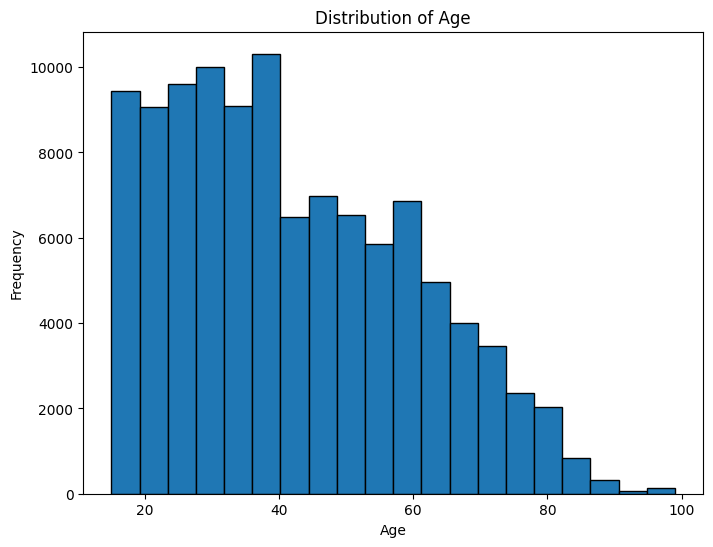

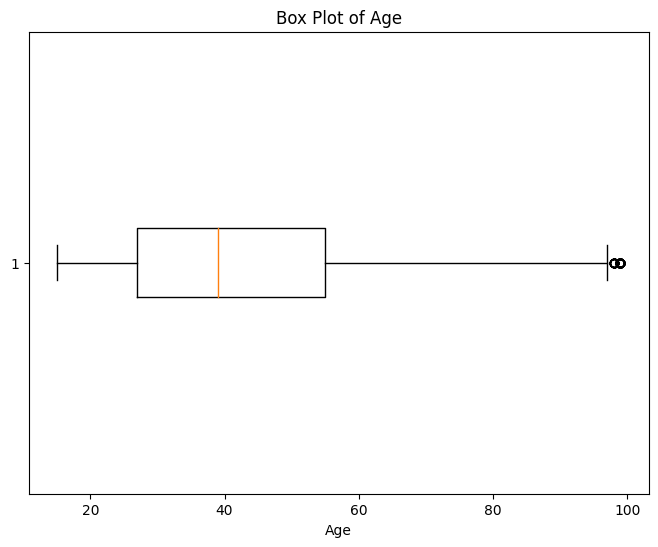

In [397]:
#What is the distribution of age in the dataset? Are there any outliers or unusual patterns?

# Extract the 'age' column from the DataFrame
ages = df['age']

# Calculate basic statistics of the 'age' column
age_stats = ages.describe()

print("Summary statistics of age column:")
print(age_stats)

# Create a histogram to visualize the age distribution
plt.figure(figsize=(8, 6))
plt.hist(ages, bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


# Create a box plot to visualize any potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(ages, vert=False)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()


In [398]:


#How many unique individuals are there in the dataset? Is there any missing data in the ID column?
# Find the number of unique individuals in the dataset
unique_individuals = df['ID'].nunique()

print("Number of unique individuals in the dataset:", unique_individuals)

Number of unique individuals in the dataset: 108446


In [399]:
#Regions have the highest and lowest number of respondents?
# Group the data by region and calculate the number of respondents in each region
region_counts = df.groupby('region').size()

# Find the region with the highest number of respondents
highest_region = region_counts.idxmax()
highest_count = region_counts.max()

# Find the region with the lowest number of respondents
lowest_region = region_counts.idxmin()
lowest_count = region_counts.min()

print("Region with the highest number of respondents:", highest_region)
print("Number of respondents in the highest region:", highest_count)

print("Region with the lowest number of respondents:", lowest_region)
print("Number of respondents in the lowest region:", lowest_count)


Region with the highest number of respondents: 0
Number of respondents in the highest region: 24548
Region with the lowest number of respondents: -1
Number of respondents in the lowest region: 715


Financial Inclusion and Access:

In [400]:
#What percentage of the population owns a bank account.
# Assuming FQ37 column contains 1 if the individual owns a bank account, 0 otherwise
bank_account_owners = df['hasBanka/c'].eq(1).sum()
total_population = len(df)

percentage_owners = (bank_account_owners / total_population) * 100

print(f"The percentage of the population that owns a bank account is: {percentage_owners:.2f}%")

The percentage of the population that owns a bank account is: 63.15%


In [401]:
#What percentage of individuals have a mobile phone or a national ID card, which can be essential for financial inclusion?

has_mobile_phone = df['mobilePhone'].eq(1).sum()
has_national_id_card = df['hasIDCard'].eq(1).sum()
total_population = len(df)



percentage_mobile_phone = (has_mobile_phone / total_population) * 100
percentage_national_id_card = (has_national_id_card / total_population) * 100

print(f"The percentage of individuals with a mobile phone is: {percentage_mobile_phone:.2f}%")
print(f"The percentage of individuals with a national ID card is: {percentage_national_id_card:.2f}%")


The percentage of individuals with a mobile phone is: 82.59%
The percentage of individuals with a national ID card is: 62.00%


Savings and Borrowing Patterns:

In [402]:
#How many people save money in the last 12 months for different purposes, such as starting a business or preparing for old age (FQ8, FQ9)?

saves_for_business = df['businSave_12m'].eq(1).sum()
saves_for_old_age = df['oldAgeSave_12'].eq(1).sum()

print(f"The number of people who save for starting a business: {saves_for_business}")
print(f"The number of people who save for old age: {saves_for_old_age}")

The number of people who save for starting a business: 15159
The number of people who save for old age: 23514


In [403]:
#How many individuals borrowed money for specific purposes, such as health/medical needs or business/farm growth?

#Count the number of individuals who borrowed money for health/medical needs  
num_borrowed_health = df['medicalLoan'].eq(1).sum() 
#Count the number of individuals who borrowed money for business/farm growth
num_borrowed_business_farm = df['businLoan'].eq(1).sum() 
print(f"Number of individuals who borrowed money for health/medical needs: {num_borrowed_health}") 
print(f"Number of individuals who borrowed money for business/farm growth: {num_borrowed_business_farm}") 

Number of individuals who borrowed money for health/medical needs: 10822
Number of individuals who borrowed money for business/farm growth: 7435


- Income and Remittances

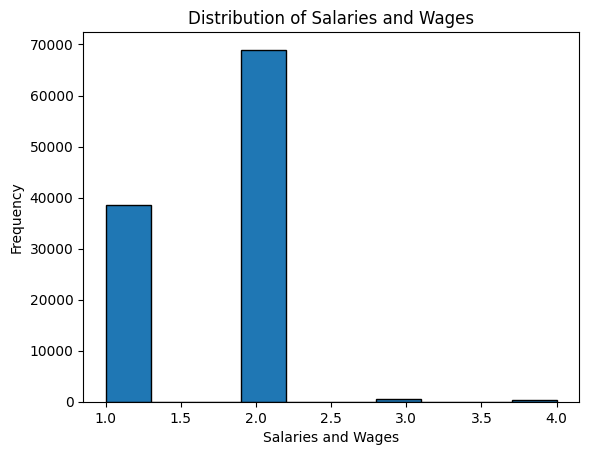

Summary statistics of Salaries and Wages:
count    108446.000000
mean          1.656022
std           0.505159
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: salary_12m, dtype: float64


In [404]:
#What is the distribution of salaries and wages received in the last 12 months?
# Plot a histogram of the distribution of salaries and wages 
plt.hist(df['salary_12m'], bins=10, edgecolor='black')
plt.xlabel('Salaries and Wages')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries and Wages')
plt.show()

# Calculate basic statistics of the FQ23 column
fq23_stats = df['salary_12m'].describe()
print("Summary statistics of Salaries and Wages:")
print(fq23_stats)


In [405]:
#How many individuals received money from friends/relatives  or sent/gave money to them?
# Count the number of individuals who received money from friends/relatives 
num_received_from_friends_relatives = df['recievFromPerson'].eq(1).sum()

# Count the number of individuals who sent money to friends/relatives 
num_sent_to_friends_relatives = df['sent2person'].eq(1).sum()
# Round the results to two decimal places
num_received_from_friends_relatives_rounded = round(num_received_from_friends_relatives,2)
num_sent_to_friends_relatives_rounded = round(num_sent_to_friends_relatives,2)

print(f"Number of individuals who received money from friends/relatives: {num_received_from_friends_relatives}")
print(f"Number of individuals who sent money to friends/relatives: {num_sent_to_friends_relatives}")

Number of individuals who received money from friends/relatives: 19273
Number of individuals who sent money to friends/relatives: 16554


In [406]:
#What percentage of individuals received financial support from the government (FQ25) or received pension payments (FQ26)?

total_individuals = df.shape[0]

# Count the number of individuals who received financial support from the government (FQ25)
num_received_financial_support = df['govFinancing'].eq(1).sum()

# Count the number of individuals who received pension payments (FQ26)
num_received_pension_payments = df['PensionF_12m'].eq(1).sum()

# Calculate the percentage of individuals who received financial support from the government (FQ25)
percentage_received_financial_support = (num_received_financial_support / total_individuals) * 100

# Calculate the percentage of individuals who received pension payments (FQ26)
percentage_received_pension_payments = (num_received_pension_payments / total_individuals) * 100

# Round the percentages to two decimal places
percentage_received_financial_support_rounded = round(percentage_received_financial_support, 2)
percentage_received_pension_payments_rounded = round(percentage_received_pension_payments, 2)

print(f"Percentage of individuals who received financial support from the government: {percentage_received_financial_support_rounded}%")
print(f"Percentage of individuals who received pension payments: {percentage_received_pension_payments_rounded}%")

Percentage of individuals who received financial support from the government: 14.7%
Percentage of individuals who received pension payments: 13.0%


- Financial Behaviours

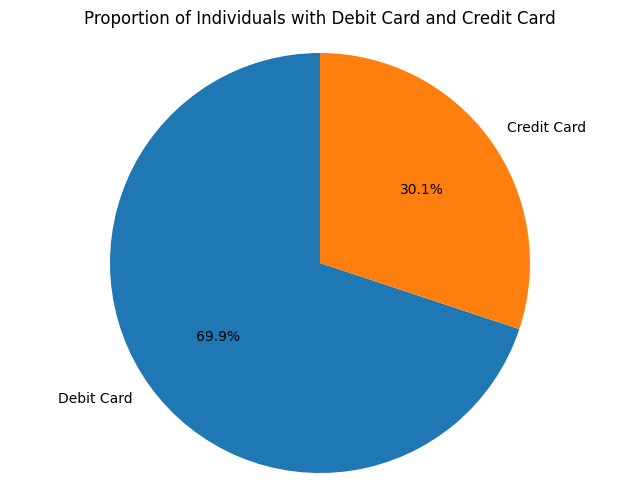

In [407]:
#How many individuals have a debit card (FQ1) or credit card (FQ4)?
# Count the number of individuals who have a debit card (FQ1)
num_have_debit_card = df['has_d/card'].eq(1).sum()

# Count the number of individuals who have a credit card (FQ4)
num_have_credit_card = df['has_c/card'].eq(1).sum()

# Create a list of labels for the pie chart
labels = ['Debit Card', 'Credit Card']

# Create a list of data values for the pie chart
data_values = [num_have_debit_card, num_have_credit_card]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(data_values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Individuals with Debit Card and Credit Card')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


In [408]:

#What percentage of individuals made money deposits (FQ6) or withdrawals to/from a bank account in the last 12 months?

# Calculate the total number of individuals in the dataset
total_individuals = df.shape[0]

# Count the number of individuals who made money deposits to a bank account (FQ6)
num_made_deposits = df['moneyDep_12m'].eq(1).sum()

# Count the number of individuals who made money withdrawals from a bank account (FQ7)
num_made_withdrawals = df['moneyOut_12m'].eq(1).sum()

# Calculate the percentage of individuals who made money deposits to a bank account (FQ6)
percentage_made_deposits = (num_made_deposits / total_individuals) * 100

# Calculate the percentage of individuals who made money withdrawals from a bank account (FQ7)
percentage_made_withdrawals = (num_made_withdrawals / total_individuals) * 100

# Round the percentages to two decimal places
percentage_made_deposits_rounded = round(percentage_made_deposits, 2)
percentage_made_withdrawals_rounded = round(percentage_made_withdrawals, 2)

print(f"Percentage of individuals who made money deposits to a bank account: {percentage_made_deposits_rounded}%")
print(f"Percentage of individuals who made money withdrawals from a bank account: {percentage_made_withdrawals_rounded}%")



Percentage of individuals who made money deposits to a bank account: 44.02%
Percentage of individuals who made money withdrawals from a bank account: 44.97%


Banking and Financial Services Usage:

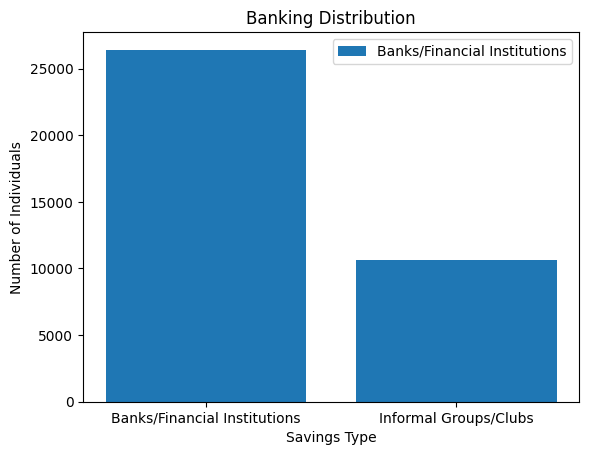

In [409]:
# Count the number of individuals who save money at banks/financial institutions (FQ10)
bank_savers_count = df['savedMoney'].eq(1).sum()

# Count the number of individuals who save money at informal groups/clubs (FQ11)
informal_savers_count = df['informalSave'].eq(1).sum()

# Create a bar chart
plt.bar(['Banks/Financial Institutions', 'Informal Groups/Clubs'], [bank_savers_count, informal_savers_count])

# Add labels and title
plt.xlabel('Savings Type')
plt.ylabel('Number of Individuals')
plt.title('Banking Distribution')

# Add legends
plt.legend(['Banks/Financial Institutions', 'Informal Groups/Clubs'])

# Display the plot
plt.show()

- Financial Literacy and Planning:

Common sources of money for individuals planning to achieve their financial goal:
2.24717    47407
1.00000    20626
2.00000    18070
3.00000    15211
4.00000     3447
5.00000     1908
6.00000     1197
7.00000      384
8.00000      196
Name: incomeSouce, dtype: int64


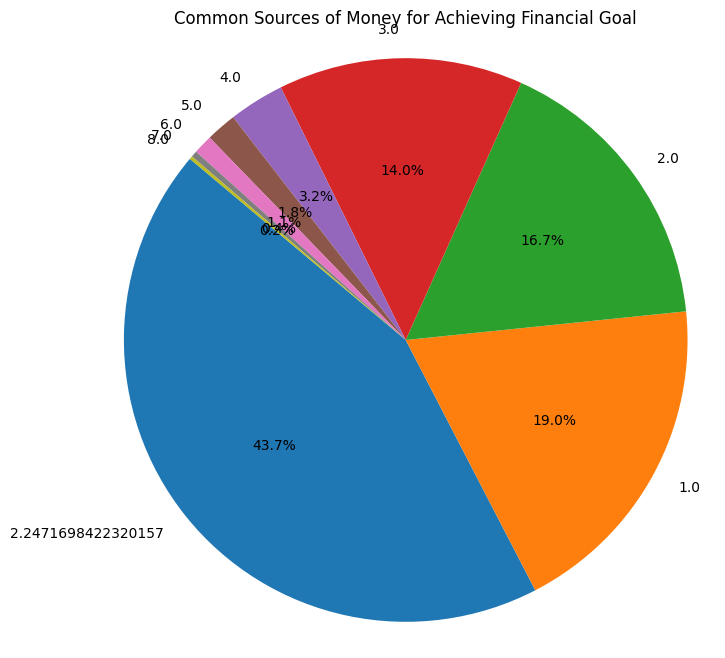

In [410]:
# Get the counts of each unique source of money for source of income
fq19_counts = df['incomeSouce'].value_counts()

# Display the most common sources of money 
print("Common sources of money for individuals planning to achieve their financial goal:")
print(fq19_counts)
# Count the occurrences of each source 
source_counts = df['incomeSouce'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Common Sources of Money for Achieving Financial Goal')

# Display the plot
plt.axis('equal')
plt.show()


- Employment and Economic Conditions

In [411]:
# Count the number of individuals who received payments for the sale of livestock, agricultural products, crops, etc.
agriSale_count = df['agriSale'].eq(1).sum()

print("Individuals who received payments for the sale agricultural products:",round(agriSale_count))

Individuals who received payments for the sale agricultural products: 12598


# Machine Learning

- Feature Selection

/var/folders/wm/y4x6nwv55jsf3cjvn9b07zh00000gn/T/ipykernel_54862/104670378.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


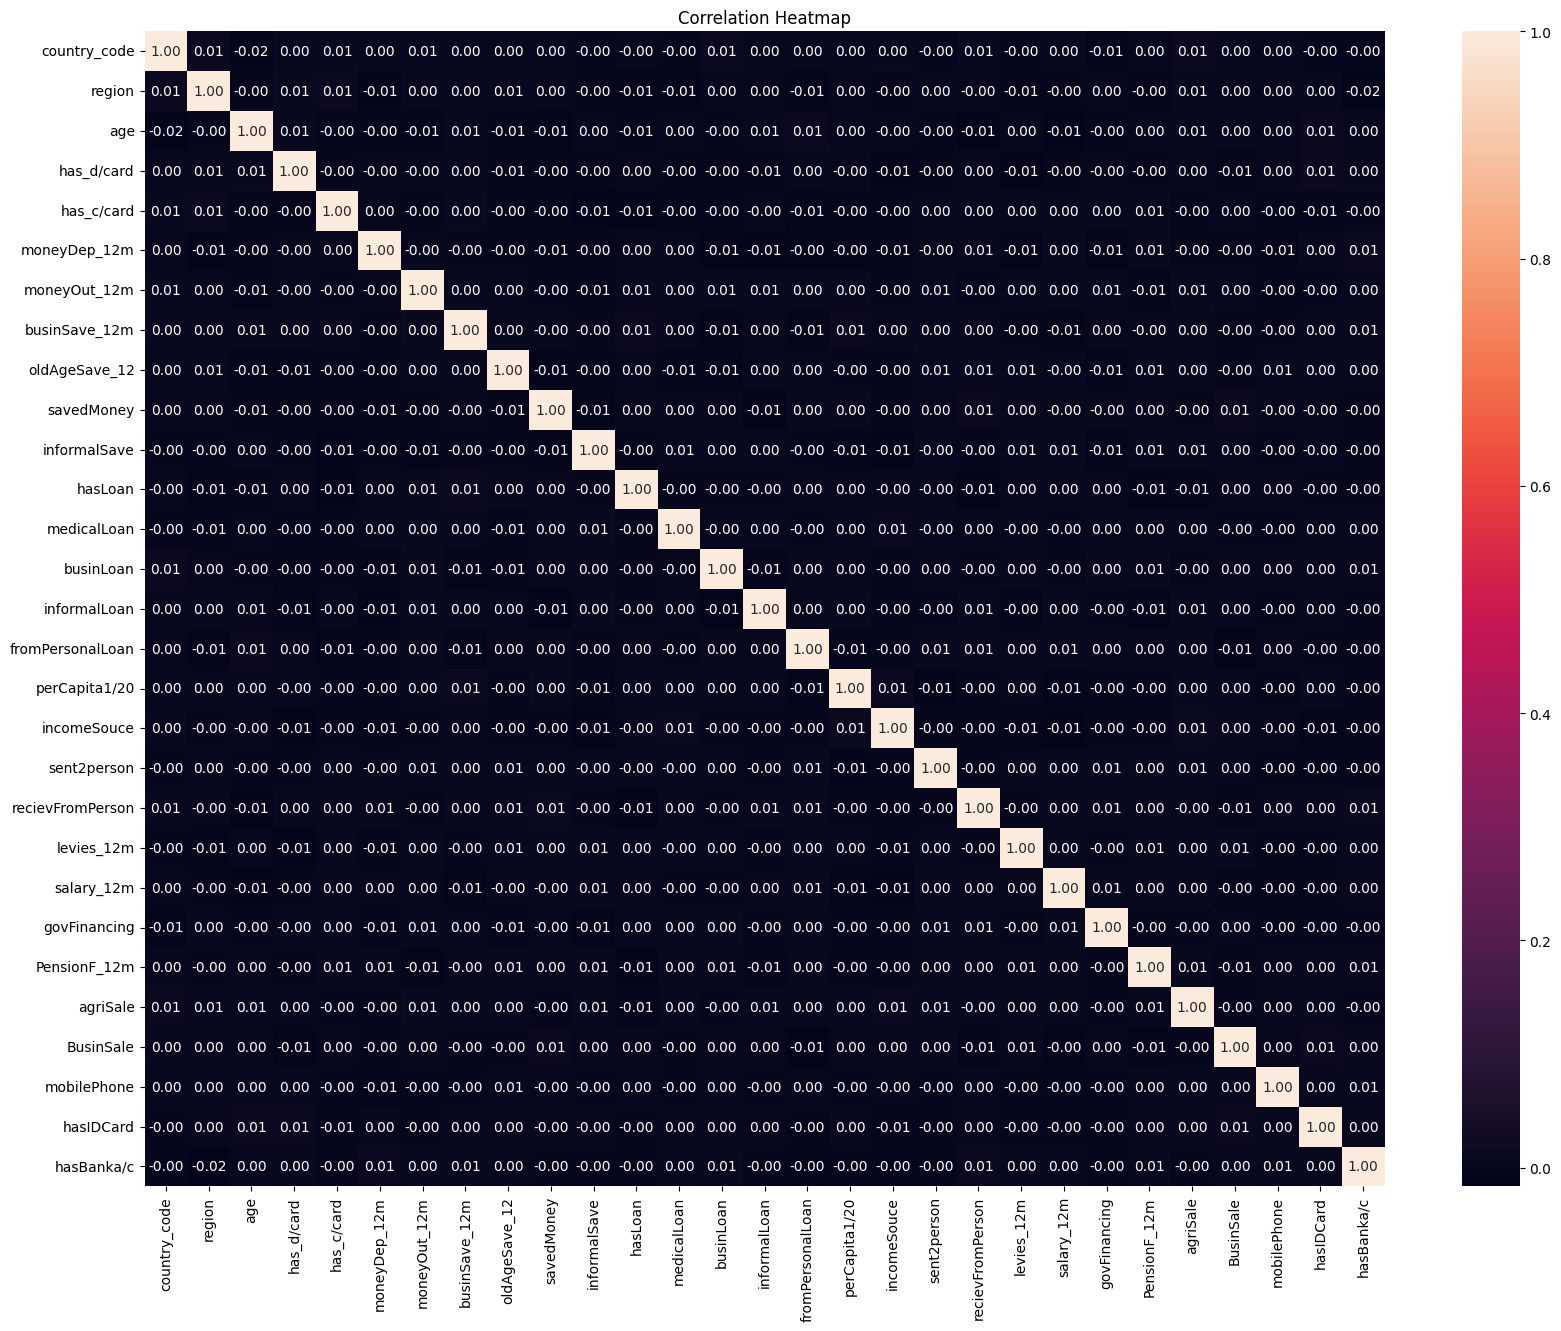

In [412]:
#correlation heat map
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/var/folders/wm/y4x6nwv55jsf3cjvn9b07zh00000gn/T/ipykernel_54862/1060870825.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


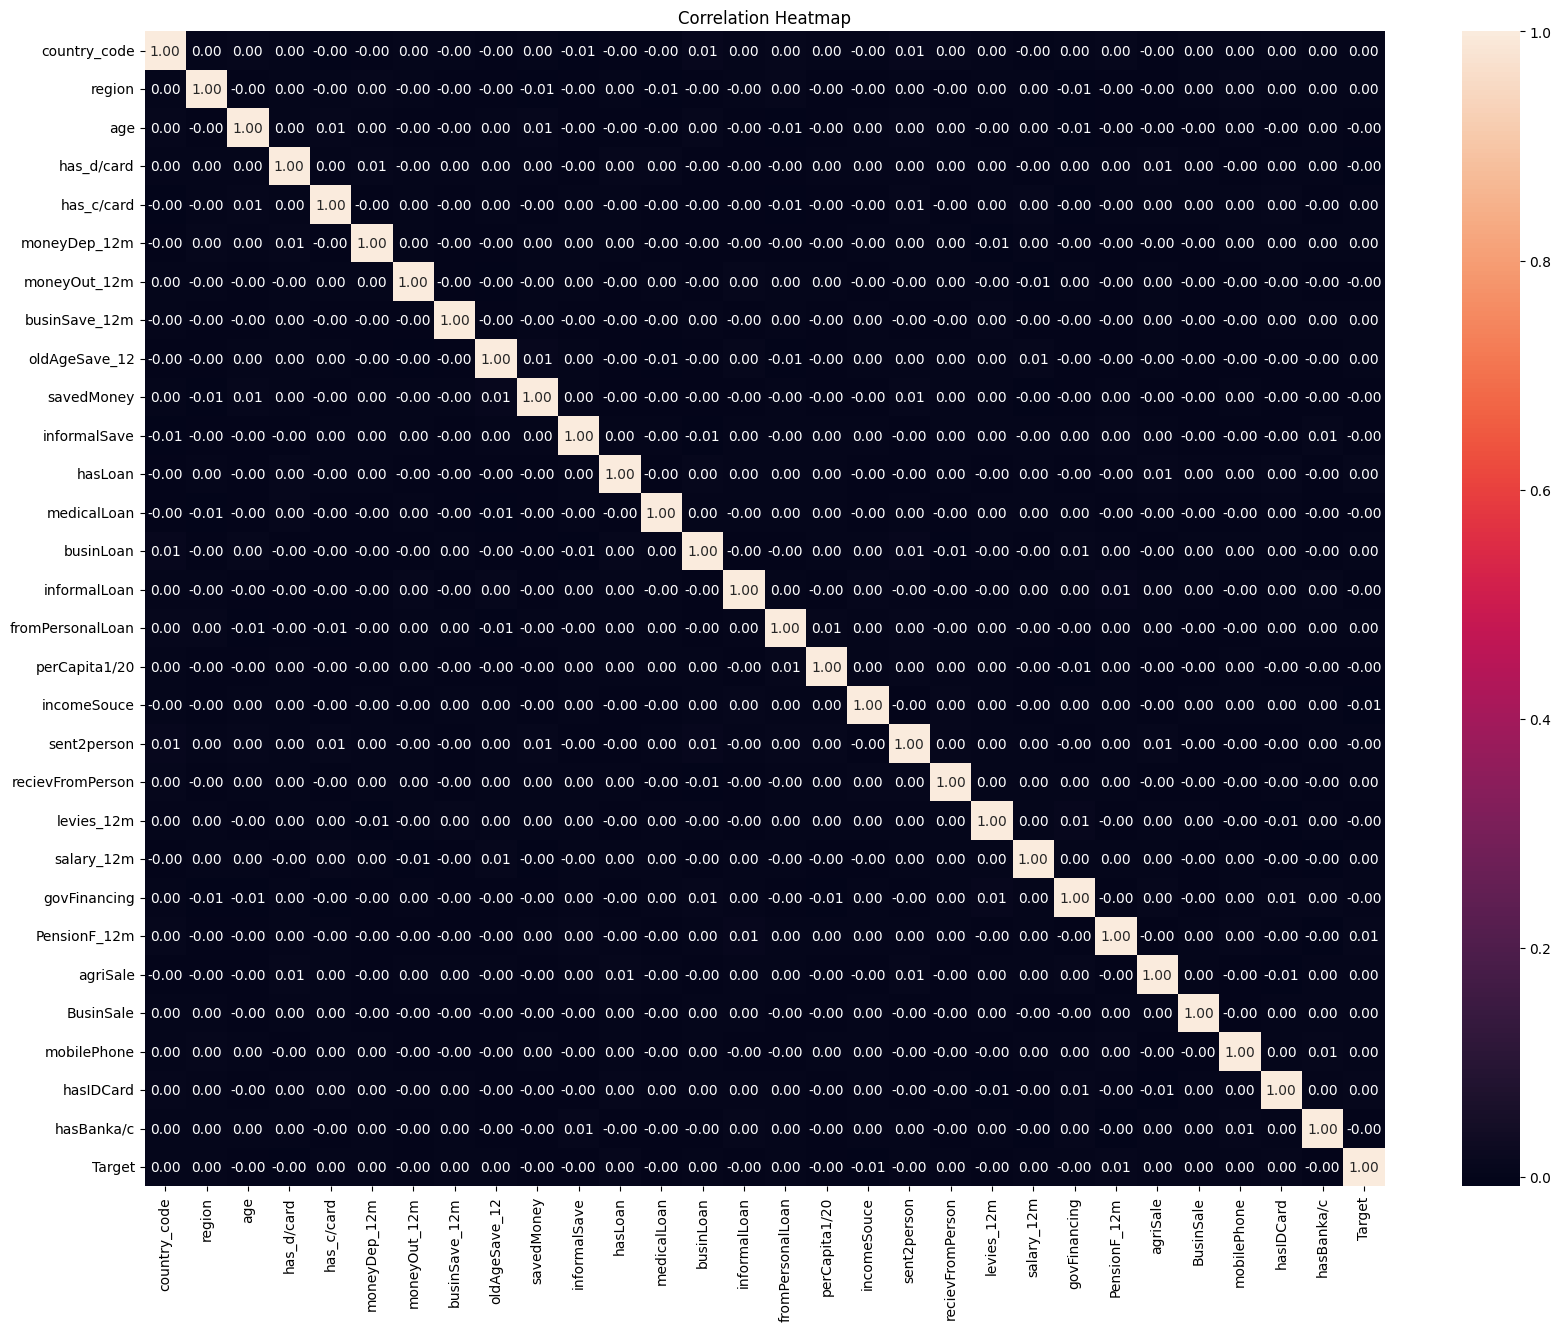

In [413]:
#correlation heat map
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [414]:
df2 = df.drop(columns='ID')

In [415]:
test_df = df1.drop(columns='ID')

# Variance Threshold

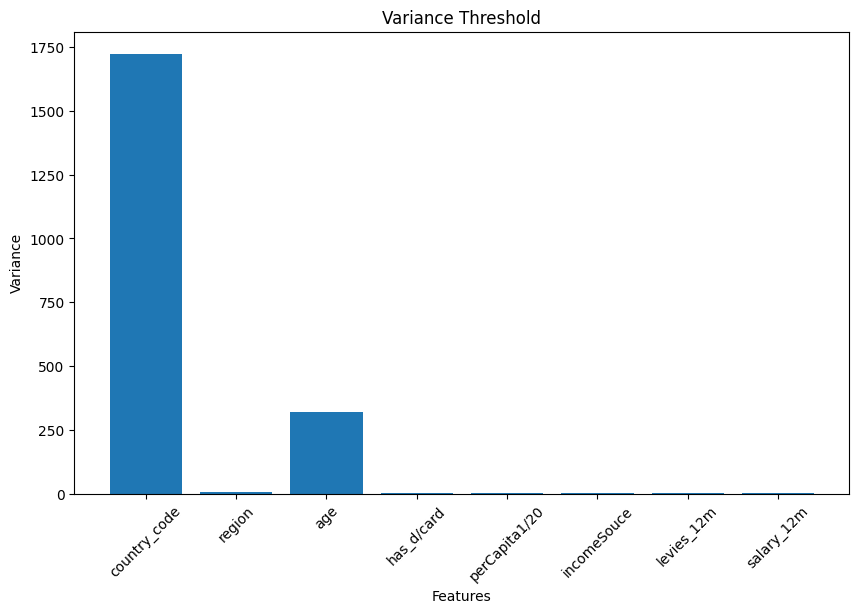

In [416]:
# Set the threshold for variance
threshold = 0.25

# Apply variance threshold to remove low-variance features
variance_selector = VarianceThreshold(threshold=threshold)
df_filtered = variance_selector.fit_transform(df2)

# Get the feature indices after filtering
selected_feature_indices = np.where(variance_selector.variances_ > threshold)[0]

# Get the variances of the remaining features
selected_feature_variances = variance_selector.variances_[selected_feature_indices]

# Plot the variance of the features
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_variances)), selected_feature_variances)
plt.xticks(range(len(selected_feature_variances)), df2.columns[selected_feature_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance Threshold')
plt.show()

/var/folders/wm/y4x6nwv55jsf3cjvn9b07zh00000gn/T/ipykernel_54862/3307375570.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_values = df2.mad()


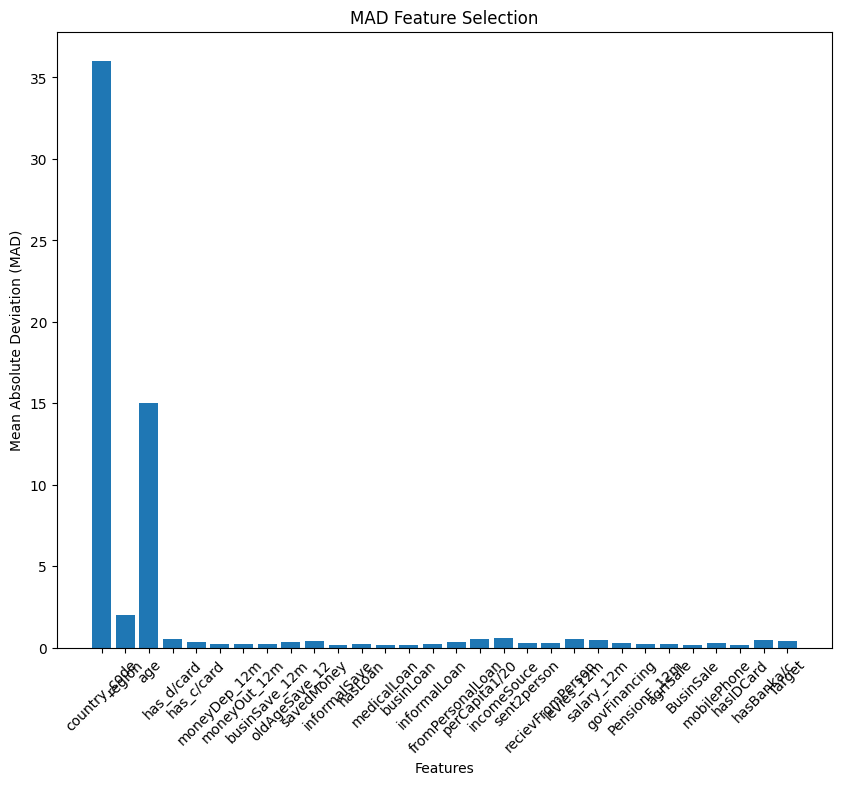

In [417]:
# Plot the MAD values for each feature
# Calculate the Mean Absolute Deviation (MAD) for each feature
mad_values = df2.mad()

# Set the threshold for MAD (you can adjust this threshold according to your needs)
threshold = 0.25

# Select features with MAD values above the threshold
selected_features = df2.columns[mad_values > threshold]

# Create a new DataFrame with only the selected features
df_selected = df2[selected_features]


plt.figure(figsize=(10, 8))
plt.bar(range(len(mad_values)), mad_values)
plt.xticks(range(len(mad_values)), df2.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Mean Absolute Deviation (MAD)')
plt.title('MAD Feature Selection')
plt.show()

Data Splitting

In [418]:
Y ='Target'
Y_Train= df[Y]

Y_Train


0         0
1         0
2         0
3         0
4         0
         ..
108441    0
108442    0
108443    1
108444    0
108445    1
Name: Target, Length: 108446, dtype: int64

In [419]:
test_df.head()

,country_code,region,age,has_d/card,has_c/card,moneyDep_12m,moneyOut_12m,businSave_12m,oldAgeSave_12,savedMoney,...,recievFromPerson,levies_12m,salary_12m,govFinancing,PensionF_12m,agriSale,BusinSale,mobilePhone,hasIDCard,hasBanka/c
0,39,2,22.0,2,2,1.000000,1.206621,1,2,2,...,1.785835,1,1,2,2,1.856478,2.000000,1.0,1.000000,0
1,30,2,62.0,1,2,1.000000,1.000000,2,1,2,...,1.785835,1,2,2,2,2.000000,1.000000,1.0,1.000000,0
2,65,4,35.0,2,1,1.222467,1.000000,2,2,2,...,2.000000,1,2,2,2,1.856478,1.850692,1.0,1.129466,0
3,123,0,24.0,2,2,1.000000,1.000000,1,2,2,...,2.000000,2,2,1,2,2.000000,1.850692,1.0,1.000000,1
4,67,2,25.0,2,1,1.222467,2.000000,2,1,2,...,2.000000,1,2,2,2,1.000000,1.850692,2.0,1.000000,1


In [420]:
X = df2.drop(columns='Target')
X.head()

,country_code,region,age,has_d/card,has_c/card,moneyDep_12m,moneyOut_12m,businSave_12m,oldAgeSave_12,savedMoney,...,recievFromPerson,levies_12m,salary_12m,govFinancing,PensionF_12m,agriSale,BusinSale,mobilePhone,hasIDCard,hasBanka/c
0,1,6,35.0,2,2,1.223907,1.000000,2,1,1,...,1.000000,1,2,2,2,1.00000,1.854744,1.0,1.0,0
1,32,7,70.0,2,2,1.223907,1.000000,2,2,2,...,1.000000,1,2,1,1,2.00000,1.854744,1.0,2.0,0
2,71,7,22.0,2,2,1.223907,1.000000,2,2,2,...,2.000000,1,2,2,1,2.00000,1.854744,2.0,1.0,1
3,48,3,27.0,1,2,2.000000,1.206961,2,1,1,...,1.783429,1,2,2,2,1.86033,2.000000,1.0,1.0,1
4,25,0,79.0,2,2,1.223907,1.206961,2,2,1,...,2.000000,1,1,2,2,2.00000,2.000000,1.0,1.0,1


<BarContainer object of 29 artists>

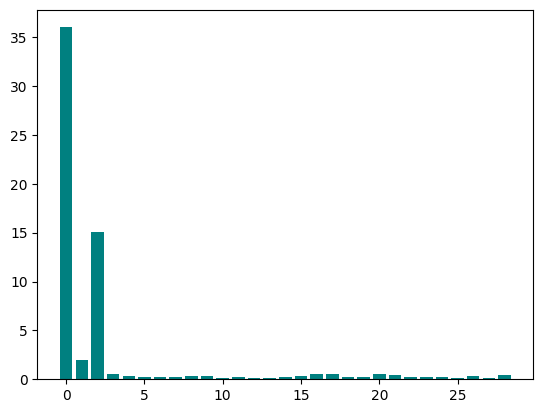

In [421]:
mean_abs_diff= np.sum(np.abs(X-np.mean(X,axis=0)),axis=0)/X.shape[0]

plt.bar(np.arange(X.shape[1]),mean_abs_diff,color = 'teal')

In [422]:
X.isna().sum()

country_code        0
region              0
age                 0
has_d/card          0
has_c/card          0
moneyDep_12m        0
moneyOut_12m        0
businSave_12m       0
oldAgeSave_12       0
savedMoney          0
informalSave        0
hasLoan             0
medicalLoan         0
businLoan           0
informalLoan        0
fromPersonalLoan    0
perCapita1/20       0
incomeSouce         0
sent2person         0
recievFromPerson    0
levies_12m          0
salary_12m          0
govFinancing        0
PensionF_12m        0
agriSale            0
BusinSale           0
mobilePhone         0
hasIDCard           0
hasBanka/c          0
dtype: int64

In [423]:
# Drop multiple columns to create a new DataFrame 'X_value'
columns_to_drop = ['has_c/card', 'moneyDep_12m','perCapita1/20','region','savedMoney','moneyOut_12m', 'businSave_12m', 'hasLoan', 'medicalLoan', 'businLoan', 'informalLoan', 'incomeSouce', 'sent2person', 'recievFromPerson', 'levies_12m', 'govFinancing', 'PensionF_12m', 'oldAgeSave_12', 'BusinSale', 'hasIDCard','mobilePhone','agriSale','fromPersonalLoan']
X_Train = X.drop(columns=columns_to_drop)

# Check the shape of 'X' and 'X_value' DataFrames
print("Shape of X:", X.shape)
print("Shape of X_value:", X_Train.shape)

# Display the first few rows of the new DataFrame 'X_value'
print(X_Train.head())

Shape of X: (108446, 29)
Shape of X_value: (108446, 6)
   country_code   age  has_d/card  informalSave  salary_12m  hasBanka/c
0             1  35.0           2           2.0           2           0
1            32  70.0           2           2.0           2           0
2            71  22.0           2           4.0           2           1
3            48  27.0           1           2.0           2           1
4            25  79.0           2           2.0           1           1


In [424]:
# Drop multiple columns to create a new DataFrame ‘test’_df
columns_to_drop = ['has_c/card', 'moneyDep_12m','savedMoney','perCapita1/20','moneyOut_12m','region', 'businSave_12m', 'hasLoan', 'medicalLoan', 'businLoan', 'informalLoan', 'incomeSouce', 'sent2person', 'recievFromPerson', 'levies_12m', 'govFinancing', 'PensionF_12m', 'oldAgeSave_12', 'BusinSale', 'hasIDCard','mobilePhone','agriSale','fromPersonalLoan']
X_Test = X.drop(columns=columns_to_drop)


print("Shape of test_df:", test_df.shape)
print("Shape of X_Test:", X_Test.shape)

print(X_Test.head())

Shape of test_df: (46477, 29)
Shape of X_Test: (108446, 6)
   country_code   age  has_d/card  informalSave  salary_12m  hasBanka/c
0             1  35.0           2           2.0           2           0
1            32  70.0           2           2.0           2           0
2            71  22.0           2           4.0           2           1
3            48  27.0           1           2.0           2           1
4            25  79.0           2           2.0           1           1


In [425]:
#scaler = Normalizer()
#X_scaled = scaler.fit_transform(X)

In [426]:
# Initialize the StandardScaler
#scaler = StandardScaler()

# Fit and transform the input features (X_value)
#X_standardized = scaler.fit_transform(X_value)

In [427]:
# Split the data into 80% training and 20% testing (you can adjust the test_size as needed)
#X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_scaled, Y_Train, test_size=0.2, random_state=49)

# Linear regression


In [428]:

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_Train, Y_Train)

LinearRegression()

In [429]:
####
y_pred = model.predict(X_Test)
y_pred

array([0.27302088, 0.27170382, 0.26748211, ..., 0.27553958, 0.27476944,
       0.27469449])

In [430]:
print(r2_score(Y_Train, model.predict(X_Train)))

3.665343463288284e-05


In [431]:

pred_df = pd.DataFrame({'ID': df['ID'], 'Target': y_pred})
pred_df

,ID,Target
0,ID_000J8GTZ,0.273021
1,ID_000QLXZM,0.271704
2,ID_001728I2,0.267482
3,ID_001R7IDN,0.276966
4,ID_0029QKF8,0.268300
...,...,...
108441,ID_ZZYY7RTO,0.273840
108442,ID_ZZYZTTC6,0.278794
108443,ID_ZZZ3OW3S,0.275540
108444,ID_ZZZLDXE8,0.274769


# Decision Trees

In [432]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_Train, Y_Train)


DecisionTreeClassifier()

In [433]:
# Make predictions on the test data
y_pred1 = dt_model.predict(X_Test)
y_pred1

array([0, 0, 0, ..., 1, 0, 1])

In [434]:
###checking
accuracy = accuracy_score(Y_Train, y_pred1)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8902403039300666


In [435]:
pred_dt = pd.DataFrame({'ID': df['ID'], 'Target': y_pred1})
pred_dt

,ID,Target
0,ID_000J8GTZ,0
1,ID_000QLXZM,0
2,ID_001728I2,0
3,ID_001R7IDN,0
4,ID_0029QKF8,0
...,...,...
108441,ID_ZZYY7RTO,0
108442,ID_ZZYZTTC6,0
108443,ID_ZZZ3OW3S,1
108444,ID_ZZZLDXE8,0


In [436]:
print(r2_score(Y_Train, dt_model.predict(X_Test)))

0.4481959670778414


 # K-Nearest Neighbours

In [437]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_Train, Y_Train)

KNeighborsClassifier()

In [438]:
# Make predictions on the test data
y_pred3 = knn_model.predict(X_Test)
y_pred3

array([0, 0, 0, ..., 1, 0, 1])

In [439]:
###checking
accuracy = accuracy_score(Y_Train, y_pred3)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7606366302122716


In [440]:
pred_knn = pd.DataFrame({'ID': df['ID'], 'Target': y_pred3})
pred_knn

,ID,Target
0,ID_000J8GTZ,0
1,ID_000QLXZM,0
2,ID_001728I2,0
3,ID_001R7IDN,0
4,ID_0029QKF8,0
...,...,...
108441,ID_ZZYY7RTO,0
108442,ID_ZZYZTTC6,0
108443,ID_ZZZ3OW3S,1
108444,ID_ZZZLDXE8,0


# Random Forest

In [441]:
rf_model = RandomForestClassifier()
rf_model.fit(X_Train, Y_Train)

RandomForestClassifier()

In [442]:
# Make predictions on the test data
y_pred2 = rf_model.predict(X_Test)
y_pred2

array([0, 0, 0, ..., 1, 0, 1])

In [443]:
# X_Train

In [444]:
# print(r2_score(y_pred2, rf_model.predict(X_Test)))

In [445]:
##checking
accuracy = accuracy_score(Y_Train, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8902310827508622


In [446]:

pred_rf = pd.DataFrame({'ID': df['ID'], 'Target': y_pred2})
pred_rf

,ID,Target
0,ID_000J8GTZ,0
1,ID_000QLXZM,0
2,ID_001728I2,0
3,ID_001R7IDN,1
4,ID_0029QKF8,0
...,...,...
108441,ID_ZZYY7RTO,0
108442,ID_ZZYZTTC6,0
108443,ID_ZZZ3OW3S,1
108444,ID_ZZZLDXE8,0


# Saving each model

In [447]:
linear_regression_file = 'LinearRegression.pkl' 
decision_tree_file = 'DecisionTreeRegressor.pkl'
knn_file = 'KNN.pkl'
#random_forest_file = 'RandomForestRegressor.pkl'

# Save each model as a pickle file
try: 
	with open(linear_regression_file, 'wb') as file: 
		pickle.dump(model, file) 
	print(f"Linear Regression model saved as {linear_regression_file} successfully.")
 
	with open(decision_tree_file, 'wb') as file: 
		pickle.dump(dt_model, file) 
		print(f"Decision Tree model saved as {decision_tree_file} 	successfully.") 

	with open(knn_file, 'wb') as file: 
		pickle.dump(knn_model, file) 
		print(f"KNN model saved as {knn_file} successfully.") 

	# with open(random_forest_file, 'wb') as file: 
	# 	pickle.dump(rf_model, file) 
	# 	print(f"Random Forest model saved as {random_forest_file} successfully.") 

except Exception as e: 
	print(f"Error saving the model: {str(e)}")


Linear Regression model saved as LinearRegression.pkl successfully.
Decision Tree model saved as DecisionTreeRegressor.pkl 	successfully.
KNN model saved as KNN.pkl successfully.


In [448]:
first_row = X_Train.iloc[0]
first_row

country_code     1.0
age             35.0
has_d/card       2.0
informalSave     2.0
salary_12m       2.0
hasBanka/c       0.0
Name: 0, dtype: float64